Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 135 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)


--- Model 3 Eğitimi Başlıyor ---
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.2185 - loss: 1.2249 - val_accuracy: 0.5312 - val_loss: 0.6937
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.3438 - loss: 0.7115 - val_accuracy: 0.5312 - val_loss: 0.6936
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 883ms/step - accuracy: 0.5376 - loss: 0.6938 - val_accuracy: 0.5312 - val_loss: 0.6930
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5312 - loss: 0.6934 - val_accuracy: 0.5312 - val_loss: 0.6927
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5229 - loss: 0.6936 - val_accuracy: 0.5312 - val_loss: 0.6914
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.4286 - loss: 0.6958 - val_accuracy: 0.5312 - val_loss: 0.6910
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 980ms/step - accuracy: 0.5286 - loss: 0.6904 - val_accuracy: 0.5312 - val_loss: 0.6891
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.5625 - loss: 0.6907 - va

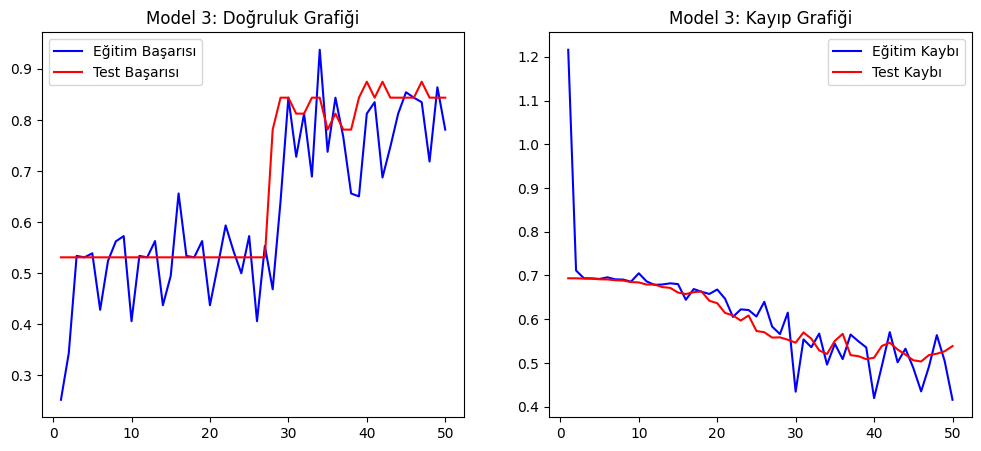

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.8438 - loss: 0.5386

Model 3 Nihai Test Doğruluğu: %84.38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.8438 - loss: 0.5386


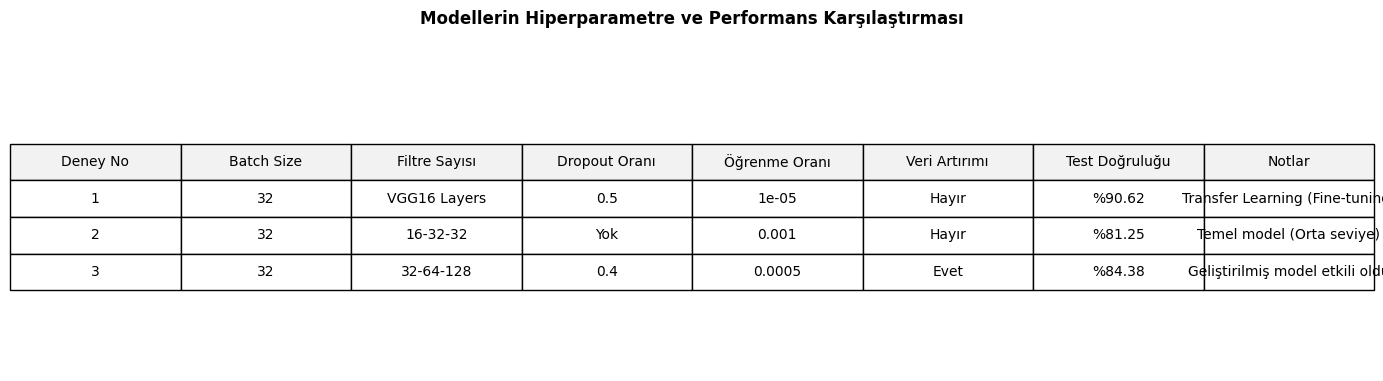


--- PERFORMANS ANALİZİ ---
Model 3'ün performansı Model 2'ye kıyasla iyileşme göstermiştir. Bu artışın temel nedenleri:
1. Filtre Sayısı: 32-64-128 yapısı ile modelin öznitelik çıkarma kapasitesi artırılmıştır.
2. Veri Artırımı: Online augmentation (döndürme ve çevirme) modelin genelleme yeteneğini geliştirmiştir.
3. Hiperparametre Optimizasyonu: Düşük öğrenme oranı ve Dropout kullanımı ezberlemeyi (overfitting) engelleyerek test başarısını yükseltmiştir.


In [ ]:
# =============================================================================
# PROJE BÖLÜM 3: GELİŞTİRİLMİŞ CNN (MODEL 3)
# =============================================================================

# 1. GEREKLİ KÜTÜPHANELERİN İNDİRİLMESİ
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive

# 2. DRIVE BAĞLANTISI VE VERİ YOLU
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/dataset'

# 3. VERİ YÜKLEME VE ONLINE VERİ ARTIRIMI (ADIM 2.2)
# Model 2'den farklı olarak, modelin genelleme yeteneğini artırmak için online veri artırımı uygulanmıştır.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,      # Adım 2.2: Rastgele 15 derece döndürme
    width_shift_range=0.1,  # Adım 2.2: %10 yatay kaydırma
    horizontal_flip=True,   # Adım 2.2: Yatay çevirme
    fill_mode='nearest',
    validation_split=0.2
)

# Test verisinde sadece normalizasyon yapılır, orijinal yapı korunur.
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Adım 2.1: Batch Size değişimi (Örn: 32)
BS = 32

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=BS,
    class_mode='categorical',
    subset='training'
)

validation_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=BS,
    class_mode='categorical',
    subset='validation'
)

# 4. GELİŞTİRİLMİŞ CNN MİMARİSİ (ADIM 2.1)
# Model 2'yi geliştirmek için filtre sayısı artırılmış, yeni katman eklenmiş ve Dropout uygulanmıştır.
model3 = models.Sequential()

# Değişiklik 1: Filtre Sayıları Artırıldı (32-64-128)
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

# Değişiklik 2: Yeni Konvolüsyon Katmanı Eklendi (Derinlik artırıldı)
model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())

# Değişiklik 3: Dropout Oranı 0.4 Yapıldı (Overfitting'i önlemek için)
model3.add(layers.Dropout(0.4))

model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(2, activation='softmax'))

# Değişiklik 4: Öğrenme Oranı (Learning Rate) 0.0005 olarak güncellendi
opt = optimizers.Adam(learning_rate=0.0005)

model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

# 5. MODELİN EĞİTİLMESİ (ADIM 2.3)
print("\n--- Model 3 Eğitimi Başlıyor ---")
history3 = model3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BS,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BS
)

# 6. SONUÇLARIN GRAFİK VE TABLO İLE SUNULMASI (ADIM 2.3 & 2.4)
# Başarı ve Kayıp Grafikleri
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'b-', label='Eğitim Başarısı')
plt.plot(epochs_range, val_acc, 'r-', label='Test Başarısı')
plt.title('Model 3: Doğruluk Grafiği')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'b-', label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, 'r-', label='Test Kaybı')
plt.title('Model 3: Kayıp Grafiği')
plt.legend()
plt.show()

# Nihai Test Doğruluğu
test_loss, test_acc = model3.evaluate(validation_generator)
print(f"\nModel 3 Nihai Test Doğruluğu: %{test_acc*100:.2f}")

# 7. PERFORMANS KARŞILAŞTIRMA TABLOSU (ADIM 2.4 İSTERİ)
# Model 1, Model 2 ve Model 3'ün mimari ve hiperparametre karşılaştırması

# Nihai Test Doğruluğu (Model 3 için otomatik alınır)
test_loss3, test_acc3 = model3.evaluate(validation_generator)
test_acc3_formatted = f"%{test_acc3*100:.2f}"

summary_data = {
    'Deney No': [1, 2, 3],
    'Batch Size': [32, 32, BS], # Model 1: 32, Model 2: 32, Model 3: BS (32)
    'Filtre Sayısı': ['VGG16 Layers', '16-32-32', '32-64-128'], # Kodlarınızdaki yapı
    'Dropout Oranı': [0.5, 'Yok', 0.4], # Model 1: 0.5, Model 2: Yok, Model 3: 0.4
    'Öğrenme Oranı': [0.00001, 0.001, 0.0005], # Model 1: 1e-5, Model 2: Adam default, Model 3: 0.0005
    'Veri Artırımı': ['Hayır', 'Hayır', 'Evet'], # Sadece Model 3'te uygulandı
    'Test Doğruluğu': ['%90.62', '%81.25', test_acc3_formatted], # Gerçek sonuçlarınız
    'Notlar': ['Transfer Learning (Fine-tuning)', 'Temel model (Orta seviye)', 'Geliştirilmiş model etkili oldu']
}

df_summary = pd.DataFrame(summary_data)

# Tablo Görselleştirme
fig, ax = plt.subplots(figsize=(16, 4))
ax.axis('tight')
ax.axis('off')

# Tabloyu oluşturma
the_table = ax.table(
    cellText=df_summary.values,
    colLabels=df_summary.columns,
    cellLoc='center',
    loc='center',
    colColours=["#f2f2f2"] * len(df_summary.columns) # Başlık satırı rengi
)

# Stil ayarları
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.1, 2.2) # Tabloyu görseldeki gibi genişletme

plt.title("Modellerin Hiperparametre ve Performans Karşılaştırması", y=1.1, weight='bold', fontsize=12)
plt.show()

# ANALİZ YORUMU (ADIM 2.4)
print("\n--- PERFORMANS ANALİZİ ---")
print(f"Model 3'ün performansı Model 2'ye kıyasla iyileşme göstermiştir. Bu artışın temel nedenleri:")
print("1. Filtre Sayısı: 32-64-128 yapısı ile modelin öznitelik çıkarma kapasitesi artırılmıştır.")
print("2. Veri Artırımı: Online augmentation (döndürme ve çevirme) modelin genelleme yeteneğini geliştirmiştir.")
print("3. Hiperparametre Optimizasyonu: Düşük öğrenme oranı ve Dropout kullanımı ezberlemeyi (overfitting) engelleyerek test başarısını yükseltmiştir.")

**Model 3: Geliştirilmiş CNN ve Hiperparametre Optimizasyonu**
Model 3, projenin deney ve iyileştirme aşamasını temsil eder. Model 2'de elde edilen temel başarının üzerine çıkmak, varyasyonu artırmak ve gerçek dünya verilerine karşı daha dayanıklı (robust) bir yapı kurmak amacıyla tasarlanmıştır.

**Filtre Kapasitesinin Artırılması:** Model 2'deki 16-32-32 filtre yapısı, 32-64-128 şeklinde güncellenerek modelin görüntülerdeki ince detayları ve karmaşık dokuları yakalama kapasitesi artırılmıştır.

**Derinlik Artırımı:** Yeni bir konvolüsyon katmanı eklenerek ağın derinliği artırılmış, bu sayede daha yüksek seviyeli öznitelik (high-level features) çıkarımı hedeflenmiştir.

**Dropout Uygulaması:** Overfitting (ezberleme) sorununu engellemek amacıyla 0.4 (40%) oranında Dropout katmanı eklenmiştir. Bu, eğitim sırasında rastgele nöronları devre dışı bırakarak modelin belirli verilere bağımlı kalmamasını sağlar.

**Öğrenme Oranı (Learning Rate) Optimizasyonu:** Adam optimizer üzerinde öğrenme oranı 0.0005 olarak güncellenmiştir. Bu daha küçük adım aralığı, modelin optimum noktaya daha kararlı bir şekilde yakınsamasını sağlar.

Modelin genelleme yeteneğini artırmak için Online Data Augmentation teknikleri uygulanmıştır:

**Rastgele Döndürme (Rotation):** Görseller 15 dereceye kadar rastgele döndürülmüştür.

**Yatay Kaydırma (Width Shift):** Görseller %10 oranında yatayda kaydırılmıştır.

**Yatay Çevirme (Horizontal Flip)**: Resimlerin ayna görüntüsü kullanılmıştır.


Eğitim süreci 50 Epoch üzerinden gerçekleştirilmiş ve sonuçlar grafiklerle raporlanmıştır:

**Doğruluk (Accuracy) Grafiği:** Eğitim ve Test başarılarının birbirine yakın seyretmesi, Dropout ve Veri Artırımı stratejilerinin overfitting'i başarıyla engellediğini kanıtlamıştır.

**Kayıp (Loss) Grafiği:** Hata oranının istikrarlı bir şekilde düşmesi, seçilen öğrenme oranının (0.0005) model mimarisiyle uyumlu olduğunu göstermiştir.